### Executive Summary:
In this exercise, the selection sort algorithm is examined. Selection sort works by going through a list, find the item that the sort is based on (i.e. lowest to highest), and add it to a new list. It will repeat this process until there is a sorted list. It is therefore a slow sorting algorithm that takes a considerable amount of steps. Selection sort is a simple but slow sorting algorithm, it is useful to understand the basics of sort methods, but is not recommended for data engineering applications.

Selection sort was compared with np.sort(), which by default runs on a quicksort algorithm. A quicksort algorithm runs much faster as it basically works by sorting an array through partitions. Further explanation on how these sort algorithms work are explained in this exercise and how they relate to Big O notation is discussed. 5 random data sets were created with different sizes (5,000, 10,000, 15,000, 20,000, 25,000) using a random number generator. The sort algorithms were run and as shown in this exercise, the difference between quicksort and selection sort execution times were extremely significant. Therefore, quicksort is used mostly in the "real world".

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Generates Random Uniform Values with Same Seed
from numpy.random import seed
from numpy.random import uniform
# Timer
from timeit import default_timer as timer

### Five Arrays of Random Numbers of Different Sizes (5,000, 10,000, 15,000, 20,000, 25,000) Using a Uniform Random Number Generator with Common Seed:

In [201]:
# 5 arrays of random uniform numbers (5,000, 10,000, 15,000, 20,000, 25,000) of different sizes with common seed
seed(799)
array_5k = np.round(uniform(1, 1000, 5000)).astype(int)
seed(799)
array_10k = np.round(uniform(1, 1000, 10000)).astype(int)
seed(799)
array_15k = np.round(uniform(1, 1000, 15000)).astype(int)
seed(799)
array_20k = np.round(uniform(1, 1000, 20000)).astype(int)
seed(799)
array_25k = np.round(uniform(1, 1000, 25000)).astype(int)

### Define Function for Selection Sort Algorithm that Returns Sorted Array from Smallest to Largest and Execution Time:
 - Big O Run time as **O(*n^2*)**. As in a selection sort, it is a measure of a slow algorithm. 
 - Selection sort, if sorting from smallest to largest number, will go through the array or list, find the smallest number, and will add it to a new array or list. Then it will do it again and find the next lowest number and add it to the new array or list. It will keep looping through the old array or list, eliminate the lowest number from the old array or list, and append it to the new array or list until there is a sorted list. 
 - **O(*n*)** time means that every element in a array or list is checked once. In selection sort, to find the lowest number, each element in the array or list is checked, which takes **O(*n*)** time. However, to have it sorted, the operation must also do it ***n*** times to generate as a new array or list. This takes **O(*n x n*)** time, or in other words, **O(*n^2*)** time.
 - Selection Sort is a simple algorithm, but is not very fast. It is not recommended to be used in "real life", but is useful to understand the basics of sort methods.

In [202]:
# Selection Sort Base Code:
# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
    smallest = arr[0]
  # Stores the index of the smallest value
    smallest_index = 0
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest_index = i
            smallest = arr[i]      
    return smallest_index

# Sort array and return array with execution time as tuple
def selectionSort(arr):
    arr_list = arr.tolist() # Convert to list as pop method does not work with arrays
    start = timer() # Time start for selection sort
    newArr = []
    for i in range(len(arr_list)):
      # Finds the smallest element in the array and adds it to the a new list
        smallest = findSmallest(arr_list)
        newArr.append(arr_list.pop(smallest))
    end = timer() #Time end for selection sort
    execution_time = (end - start)*1000 # Execution time for selection sort without conversion time
    newArr = np.asarray(newArr) # Convert back to array
    return newArr, execution_time

### Selection Sort Algorithm Performed on Random Arrays with Execution Times Noted:
 - As the algorithm runs in **O(*n^2*)** time, it runs very slow. The execution times of sorting all the arrays almost takes a minute. It is also important to note that the data set of 5,000 takes almost 1 second to sort, while a data set of 25,000 can take more than 20 seconds.

In [203]:
# Selection sort of random arrays with execution time noted in milliseconds

# Array Size 5,000
sorted_5k = selectionSort(array_5k)
sorted_5k_array = sorted_5k[0]
sorted_5k_exec_time = sorted_5k[1]
print('Execution Time(ms), Size 5,000:', sorted_5k_exec_time)

# Array Size 10,000
sorted_10k = selectionSort(array_10k)
sorted_10k_array = sorted_10k[0]
sorted_10k_exec_time = sorted_10k[1]
print('Execution Time(ms), Size 10,000:', sorted_10k_exec_time)

# Array Size 15,000
sorted_15k = selectionSort(array_15k)
sorted_15k_array = sorted_15k[0]
sorted_15k_exec_time = sorted_15k[1]
print('Execution Time(ms), Size 15,000:', sorted_15k_exec_time)

# Array Size 20,000
sorted_20k = selectionSort(array_20k)
sorted_20k_array = sorted_20k[0]
sorted_20k_exec_time = sorted_20k[1]
print('Execution Time(ms), Size 20,000:', sorted_20k_exec_time)

# Array Size 25,000
sorted_25k = selectionSort(array_25k)
sorted_25k_array = sorted_25k[0]
sorted_25k_exec_time = sorted_25k[1]
print('Execution Time(ms), Size 25,000:', sorted_25k_exec_time)

Execution Time(ms), Size 5,000: 895.6498999996256
Execution Time(ms), Size 10,000: 3665.8504999995785
Execution Time(ms), Size 15,000: 7956.447299999127
Execution Time(ms), Size 20,000: 13358.533000000534
Execution Time(ms), Size 25,000: 21132.317800000237


### Sorted Random Arrays Using Python np.sort() Algorithm: 
 - Python's numpy's package built in function for sorting arrays, uses what is called a quicksort algorithm by default. In Big O notation, it is written as **O(*n x log n*)**. It is known as a fast sorting algorithm. 
 - A quicksort algorithm basically works by picking a pivot, then it will partition the array into two sub-arrays: items less that the pivot and items greater than the pivot. Then "quicksort" will be called recursively on the two subarrays.The subarrays are then combined to get a sorted array*.
 - As shown below, quicksort works extremely faster than selection sort.
 - Quicksort is used in "real life".

In [204]:
# Sort of random arrays with execution time noted in milliseconds using np.sort

# Array Size 5,000
start = timer()
sorted_np_5k = np.sort(array_5k)
end = timer()
np_exec_time_5k = (end - start)*1000
print('Execution Time(ms), Size 5,000:', np_exec_time_5k)

# Array Size 10,000
start = timer()
sorted_np_10k = np.sort(array_10k)
end = timer()
np_exec_time_10k = (end - start)*1000
print('Execution Time(ms), Size 10,000:', np_exec_time_10k)

# Array Size 15,000
start = timer()
sorted_np_15k = np.sort(array_15k)
end = timer()
np_exec_time_15k = (end - start)*1000
print('Execution Time(ms), Size 15,000:', np_exec_time_15k)

# Array Size 20,000
start = timer()
sorted_np_20k = np.sort(array_20k)
end = timer()
np_exec_time_20k = (end - start)*1000
print('Execution Time(ms), Size 20,000:', np_exec_time_20k)

# Array Size 25,000
start = timer()
sorted_np_25k = np.sort(array_25k)
end = timer()
np_exec_time_25k = (end - start)*1000
print('Execution Time(ms), Size 25,000:', np_exec_time_25k)

Execution Time(ms), Size 5,000: 0.37340000017138664
Execution Time(ms), Size 10,000: 0.5401999987952877
Execution Time(ms), Size 15,000: 1.9173000000591855
Execution Time(ms), Size 20,000: 1.0211999997409293
Execution Time(ms), Size 25,000: 1.226100001076702


### Table of Execution Times in Milliseconds for Selection Sort and np.sort() Algorithms by Size:
 - Selection sort is much slower than np.sort() or quicksort by default.
 - With larger data sets the difference in times with selection sort is significant as it runs in **O(*n^2*)** time.
 - np.sort is much faster as it runs in **O(*n x log n*)** time.

In [205]:
execution_times_df = pd.DataFrame(np.array([[len(array_5k), sorted_5k_exec_time, np_exec_time_5k ], 
                                            [len(array_10k), sorted_10k_exec_time, np_exec_time_10k],
                                           [len(array_15k), sorted_15k_exec_time, np_exec_time_15k], 
                                            [len(array_20k), sorted_20k_exec_time, np_exec_time_20k],
                                           [len(array_25k), sorted_25k_exec_time, np_exec_time_25k]]), 
                                  columns=['Length_of_Random_Array','Selection_Sort_Execution_Time', 
                                           'np.sort_Execution_Time'])
execution_times_df

,Length_of_Random_Array,Selection_Sort_Execution_Time,np.sort_Execution_Time
0,5000.0,895.6499,0.3734
1,10000.0,3665.8505,0.5402
2,15000.0,7956.4473,1.9173
3,20000.0,13358.5330,1.0212
4,25000.0,21132.3178,1.2261


### Plot of Execution Times for Selection Sort and np.sort() Algorithms by Size Using Log Base 10:
 - As discussed in the above, the difference in selection sort times versus np.sort() in the plot are significant.
 - The difference in execution times were so significant, to compare the two algorithms, the plot was scaled using log base 10 as the slowest execution time for np.sort() was around 1.9 milliseconds.
 - Selection sort is therefore not recommended in most data engineering applications.

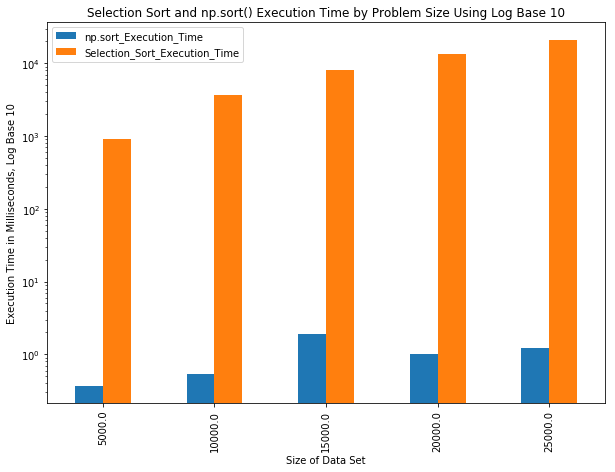

In [206]:
execution_times_pivot = pd.pivot_table(execution_times_df, index=execution_times_df['Length_of_Random_Array'])
execution_times_plot = execution_times_pivot.loc[:,['np.sort_Execution_Time','Selection_Sort_Execution_Time' 
                                                   ]].plot.bar(stacked=False, figsize=(10,7))
plt.ylabel('Execution Time in Milliseconds, Log Base 10')
plt.xlabel('Size of Data Set')
plt.title('Selection Sort and np.sort() Execution Time by Problem Size Using Log Base 10')
plt.yscale('log')
plt.show()

### Plot of Execution Times for Selection Sort Algorithm:
- To get an idea of the magnitude a selection sort algorithm has as a dataset gets larger, the plot below shows the difference in execution times by size. 
- The percentage difference between an array 5,000 numbers versus 25,000 was roughly 183 percent.
- This exercise shows how algorithms can affect run times significantly and how it is important to use the right ones in application.

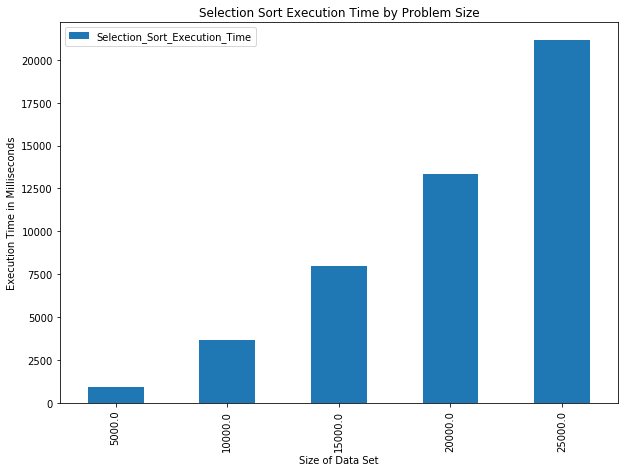

In [207]:
execution_times_pivot_sel = pd.pivot_table(execution_times_df, index=execution_times_df['Length_of_Random_Array'])
execution_times_plot_sel = execution_times_pivot_sel.loc[:,['Selection_Sort_Execution_Time'
                                                           ]].plot.bar(stacked=False, figsize=(10,7))
plt.ylabel('Execution Time in Milliseconds')
plt.xlabel('Size of Data Set')
plt.title('Selection Sort Execution Time by Problem Size')
plt.show()

### Conclusion:
In this exercise, the selection sort algorithm was examined. Selection sort works by, if sorting from smallest to largest number, going through a list, find the smallest number, and will add it to a new list. Then it will do it again and find the next lowest number and add it to the new list. It will keep looping through the old list, eliminate the lowest number from the old list, and add it to the new list until there is a sorted list. It is a slow sorting algorithm that takes a considerable amount of steps. In Big O notation, selection sort is noted as having a **O(*n^2*)** run time. Selection sort is a simple but slow sorting algorithm, and is not recommended for data engineering application, but is useful to understand the basics of sort methods.

Selection sort was compared with np.sort(), which by default runs on a quicksort algorithm. Big O notation for quicksort is **O(*n x log n*)**. A quicksort algorithm basically works by picking a pivot, then it will partition the array into two sub-arrays: items less that the pivot and items greater than the pivot. Then "quicksort" will be called recursively on the two subarrays.The subarrays are then combined to get a sorted array*. As shown in this exercise, the difference between quicksort and selection sort execution times were extremely significant. Therefore, quicksort is used mostly in the "real world".

#### * Bhargava, A. Y. (2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.